Import packages

In [36]:
import pandas as pd 
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Import dataset and select x and y data

In [2]:
dataset=pd.read_csv('./data/driver_clean_data.csv')

We will first select all the possible data that we might consider as input data. Then, we will try different networks with different subsets of this big X vector.

In [8]:
Xall = dataset[['Year','RaceResults','GridPos','QualiRes','NumRaces','AvgFinalPos','StdDevFinalPos','MedianFinalPos','AvgStartPos','StdDevStartPos','MedianStartPos']]
y = dataset['Championship Position']

In [12]:
#Split in train and test datasets
Xall_train, Xall_test, y_train, y_test = train_test_split(Xall, y, random_state=111,test_size=0.3,shuffle=True)

In [13]:
Xall_train[['AvgFinalPos','StdDevFinalPos']].head()

,AvgFinalPos,StdDevFinalPos
59,8.500000,8.817596
664,7.421053,5.696867
757,12.250000,3.973349
573,14.947368,6.108438
487,15.055556,5.512332


In [21]:
dataset['Championship Position'].max()

46

Since all the input and output values have similar size and there is no more than an order of magnitude of difference between minimum and maximum, there is no need to normalize the values.

Now, I will construct different models with different inputs to compare their predictive power.
They will all use dense layers. I will also test different hyperparameter configurations.
The output  will not be hardcoded, i.e. the last layer will give a number between 1 and 46, which is the maximum Championship position found in the dataset.

Model 1: Final position average and standard deviation as input

Define model architecture

In [30]:
model1=Sequential()
model1.add(Dense(10,activation='relu',input_shape=(2,)))
model1.add(Dense(20,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='linear'))

Compile model and show summary

In [31]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [33]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471 (1.84 KB)
Trainable params: 471 (1.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Select data

In [27]:
xmod1_train=np.float32(Xall_train[['AvgFinalPos','StdDevFinalPos']].values)
xmod1_test=np.float32(Xall_test[['AvgFinalPos','StdDevFinalPos']].values)
ymod_train=np.float32(y_train.values)
ymod_test=np.float32(y_test.values)

In [29]:
print(xmod1_train.shape)
print(ymod_train.shape)
print(xmod1_test.shape)
print(ymod_test.shape)

(592, 2)
(592,)
(255, 2)
(255,)


Train model

In [35]:
histo1=model1.fit(xmod1_train,ymod_train,epochs=30,validation_data=(xmod1_test,ymod_test))

Epoch 1/30
19/19 [==============================] - 0s 7ms/step - loss: 190.8109 - accuracy: 0.0338 - val_loss: 180.4364 - val_accuracy: 0.0471
Epoch 2/30
19/19 [==============================] - 0s 3ms/step - loss: 146.9350 - accuracy: 0.0338 - val_loss: 128.4280 - val_accuracy: 0.0471
Epoch 3/30
19/19 [==============================] - 0s 3ms/step - loss: 98.4581 - accuracy: 0.0338 - val_loss: 76.6613 - val_accuracy: 0.0471
Epoch 4/30
19/19 [==============================] - 0s 3ms/step - loss: 55.3526 - accuracy: 0.0338 - val_loss: 37.7778 - val_accuracy: 0.0471
Epoch 5/30
19/19 [==============================] - 0s 3ms/step - loss: 29.1700 - accuracy: 0.0338 - val_loss: 23.3961 - val_accuracy: 0.0471
Epoch 6/30
19/19 [==============================] - 0s 3ms/step - loss: 21.8317 - accuracy: 0.0338 - val_loss: 21.9493 - val_accuracy: 0.0471
Epoch 7/30
19/19 [==============================] - 0s 3ms/step - loss: 21.1980 - accuracy: 0.0338 - val_loss: 21.4952 - val_accuracy: 0.0471
Ep

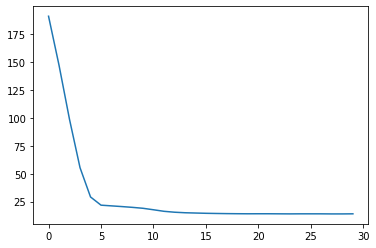

In [38]:
plt.plot(histo1.history['loss'])

In [46]:
model1.predict(xmod1_test[:3])

1/1 [==============================] - 0s 50ms/step


array([[15.46768 ],
       [14.139608],
       [ 6.379131]], dtype=float32)

In [47]:
ymod_test[:3]

array([16., 18.,  7.], dtype=float32)